In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('level_salary_large.csv')
dataset.head(10)

,Level,Salary
0,1,77635
1,2,54686
2,3,108784
3,4,173351
4,5,112292
5,6,145093
6,7,274560
7,8,278771
8,9,267726
9,10,375128


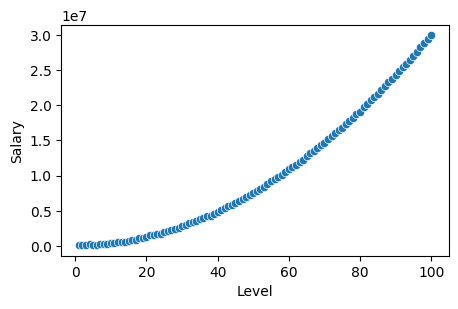

In [34]:
plt.figure(figsize=(5,3))
sns.scatterplot( x=dataset['Level'] ,y=dataset['Salary'])
plt.show()

In [86]:
x = dataset[['Level']]
y = dataset['Salary']

In [51]:
#now convert into polynomial nature
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [87]:
pf.fit(dataset[['Level']])
x = pf.fit_transform(dataset[['Level']])
x.shape

#now we convert data into polynomial nature and fit back in array

(100, 3)

In [14]:
#split test and train data
from sklearn.model_selection import train_test_split


In [88]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,  test_size=0.2, random_state=42)

In [89]:
# now apply polynomial reg
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [90]:
lr.fit(x_train , y_train)

LinearRegression()

In [91]:
lr.score(x_test , y_test)

0.9999766492249328

In [57]:
#how our equation looks like 
# y = m1x1 + m2x2^2 + c


In [92]:
lr.coef_   # this is m1 and m2

array([   0.        , -523.43559664, 3003.7374318 ])

In [93]:
lr.intercept_ #this is c

np.float64(47699.993778569624)

In [94]:
prd = lr.predict(x)


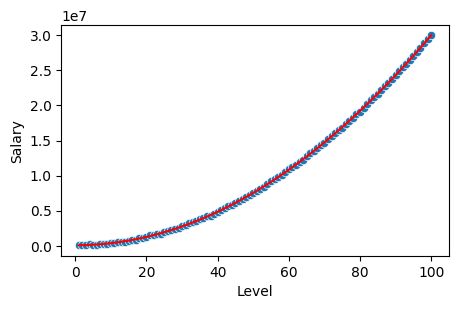

In [95]:
plt.figure(figsize=(5,3))
plt.plot(dataset['Level'] , prd , c = 'red')
sns.scatterplot( x=dataset['Level'] ,y=dataset['Salary'])
plt.show()

In [98]:
#chking
test = pf.transform([[1]])
test

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1., 1., 1.]])

In [99]:
lr.predict(test)

array([50180.29561374])